In [462]:
%matplotlib notebook
import numpy as np
from scipy.sparse import diags
import scipy.linalg as la
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
import pandas as pd

In [463]:
params = pd.read_csv('input.txt',header=None).values.flatten()
coeffs = pd.read_csv('coefficients.txt',header=None, names=['k','S'], sep='\s+')
L, N, v, t = list(params)
N = int(N)
k = coeffs.k.values
S = coeffs.S.values

#N = 1000
#S = np.zeros(1000)
#S[10] = 10
#S[500] = 15
#k = np.ones(1000)
#L=100
#t = -0.1
#v = 0.1

dx = L/N
print(L,N,v,t)
print(coeffs)

10.0 20 10.0 0.1
      k    S
0   1.0  0.0
1   1.0  0.0
2   1.0  0.0
3   1.0  0.0
4   1.0  0.0
5   1.0  0.0
6   1.0  0.0
7   1.0  0.0
8   1.0  0.0
9   1.0  1.0
10  1.0  0.0
11  1.0  0.0
12  1.0  0.0
13  1.0  0.0
14  1.0  0.0
15  1.0  0.0
16  1.0  0.0
17  1.0  0.0
18  1.0  0.0
19  1.0  0.0


In [464]:
M = np.zeros((2*N, 2*N))
f = np.zeros((2*N,1))

Sa = np.zeros((N,N))
Sa[0,0] = -k[0]/dx - v
Sa[0,1] = k[0]/dx
f[0] = -1.*S[0]

for i in range(N-1):
    j = i + 1
    Kj = (k[j]-k[j-1])/dx**2
    a1 = -Kj + k[j]/dx**2 + v/dx
    a2 = Kj -2*k[j]/dx**2 -v/dx - t
    a3 = k[j]/dx**2
    Sa[j, j-1] = a1
    Sa[j, j] = a2
    if j < N-1:
        Sa[j, j+1] = a3
    f[j] = -1*S[j]
        
    

Sb = np.zeros((N,N))
Sb[0,0] = -k[0]/dx - v
Sb[0,1] = k[0]/dx

for i in range(N-1):
    j = i + 1
    Kj = (k[j]-k[j-1])/dx**2
    b1 = -Kj + k[j]/dx**2 + v/dx
    b2 = Kj-2*k[j]/dx**2 - v/dx
    b3 = k[j]/dx**2
    Sb[j, j-1] = b1
    Sb[j, j] = b2
    if j < N-1:
        Sb[j, j+1] = b3

tI = t*np.identity(N)
Z = np.zeros((N,N))
M[:N,:N] = Sa
M[N:,:N] = tI
M[:N,N:] = Z
M[N:,N:] = Sb

np.set_printoptions(threshold=np.nan)
print(M)
np.set_printoptions(threshold=5)
#C = la.solve(M,f)

[[-12.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [ 24.  -28.1   4.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [  0.   24.  -28.1   4.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.   24.  -28.1   4.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.    

<IPython.core.display.Javascript object>


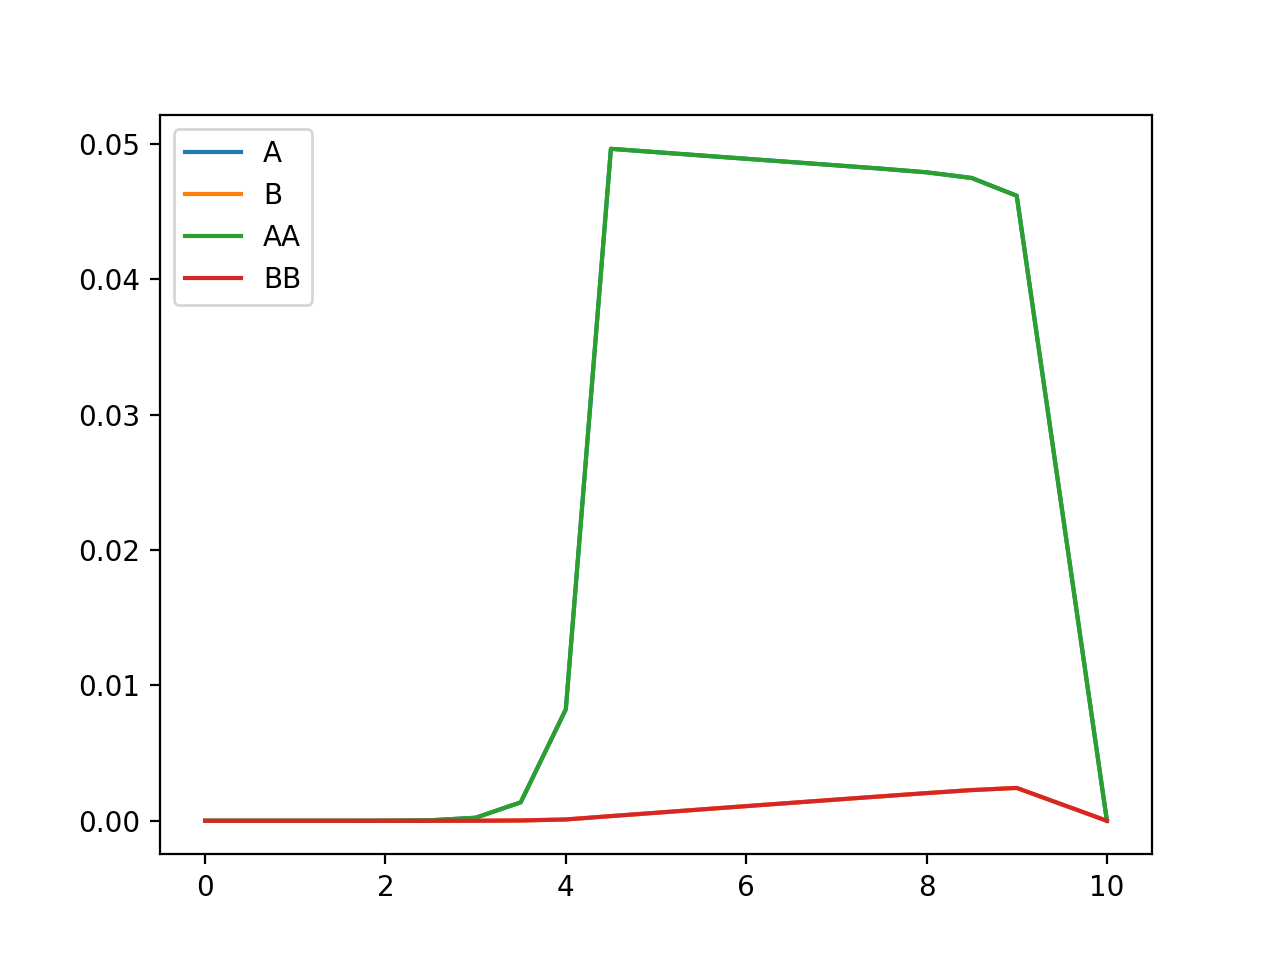

      xx            AA            BB
0    0.0  4.739170e-09  2.696760e-10
1    0.5  2.843500e-08  1.381100e-09
2    1.0  1.713210e-07  7.338760e-09
3    1.5  1.032920e-06  3.880170e-08
4    2.0  6.228330e-06  2.017560e-07
5    2.5  3.755650e-05  1.023780e-06
6    3.0  2.264650e-04  5.016980e-06
7    3.5  1.365570e-03  2.331460e-05
8    4.0  8.234370e-03  9.896090e-05
9    4.5  4.965300e-02  3.469790e-04
10   5.0  4.940620e-02  5.937650e-04
11   5.5  4.916070e-02  8.393240e-04
12   6.0  4.891630e-02  1.083660e-03
13   6.5  4.867310e-02  1.326770e-03
14   7.0  4.843030e-02  1.568610e-03
15   7.5  4.818470e-02  1.808880e-03
16   8.0  4.791550e-02  2.045910e-03
17   8.5  4.749840e-02  2.270170e-03
18   9.0  4.618290e-02  2.428260e-03
19  10.0  0.000000e+00  0.000000e+00


In [474]:
C = la.solve(M,f)
data = pd.read_csv('output.txt', header=None, sep='\s+', names=['xx', 'AA', 'BB'])
x = [i*dx for i in range(N)]
x[-1] = L
C[N-1] = 0
C[-1] = 0
plt.plot(x, C[:N], label='A')
plt.plot(x, C[N:], label='B')
plt.plot('xx', 'AA', data=data, label='AA')
plt.plot('xx', 'BB', data=data, label='BB')
plt.legend()
#print(x)
#print(C[:N].flatten())
print(data)

In [441]:
ncols=20
L=1
dx = L/(ncols+1)
A = diags([1, -2, 1], [-1, 0, 1], shape=(ncols, ncols)).toarray()
S = -np.ones((ncols,1))


In [442]:
t = la.solve(1/(dx*dx)*A,S)

In [444]:
T = lambda x: -x**2/2 +x/2
x = [(i+1)*dx for i in range(ncols)]
y = np.array([T(i) for i in x])
plt.plot(x, y, 'r')
plt.plot(x, t)

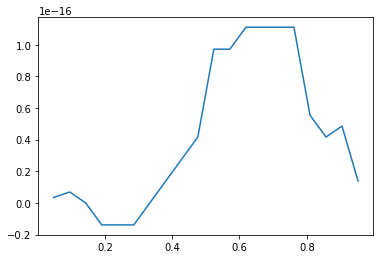

In [146]:
plt.plot(x, y-t.flatten())